In [2]:
#IMAGE COMPRESSING USING PCA (PRINCIPAL COMPONENT ANALYSIS)
#MADE BY AADITYA DEV SHARMA

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.decomposition import PCA

In [5]:
img = cv2.cvtColor(cv2.imread("coffee.jpg"),cv2.COLOR_BGR2RGB) 
#when we import any image from cv2, its color channel is bgr and not rgb. Hence, we need to convert the color channel back to rgb

In [6]:
img.shape

(6016, 4016, 3)

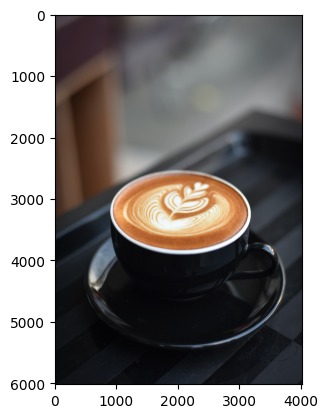

In [7]:
plt.imshow(img)

In [8]:
r,g,b = cv2.split(img) #splitting the image into the individual rgb color channels

In [9]:
#normalisation
r,g,b = r/255.,g/255.,b/255.

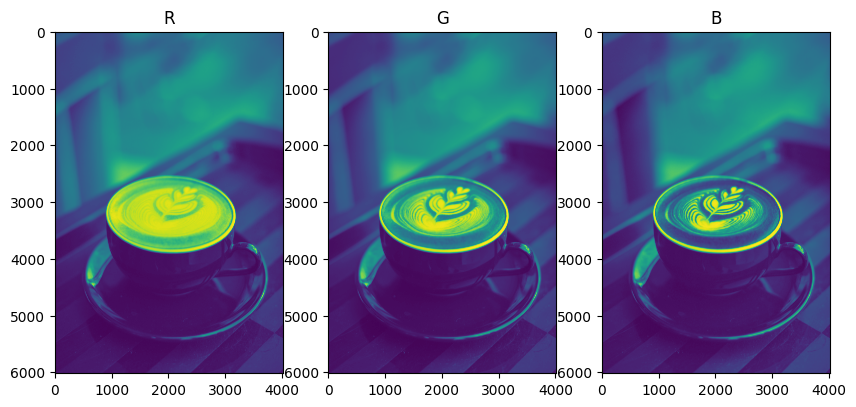

In [25]:
#viewing the individual color channels
fig = plt.figure(figsize=(10,7))

ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.imshow(r)
ax2.imshow(g)
ax3.imshow(b)

ax1.set_title("R")
ax2.set_title("G")
ax3.set_title("B")

plt.show()

In [14]:
pca_components = 50 #how much of a reduce i want to get (we are going from 4016 to 50)

pca_r = PCA(n_components=pca_components)
reduced_r_channel = pca_r.fit_transform(r)

pca_g = PCA(n_components=pca_components)
reduced_g_channel = pca_g.fit_transform(g)

pca_b = PCA(n_components=pca_components)
reduced_b_channel = pca_b.fit_transform(b)

In [15]:
reduced_b_channel.shape, reduced_g_channel.shape, reduced_b_channel.shape

((6016, 50), (6016, 50), (6016, 50))

In [16]:
reduced_combined_channels = np.array([reduced_b_channel,reduced_g_channel,reduced_g_channel])

In [17]:
#lets try to reconstruct the images using inverse transform
reconstructed_r_channel = pca_r.inverse_transform(reduced_r_channel)
reconstructed_g_channel = pca_g.inverse_transform(reduced_g_channel)
reconstructed_b_channel = pca_b.inverse_transform(reduced_b_channel)

In [18]:
reconstructed_r_channel.shape, reconstructed_g_channel.shape, reconstructed_b_channel.shape

((6016, 4016), (6016, 4016), (6016, 4016))

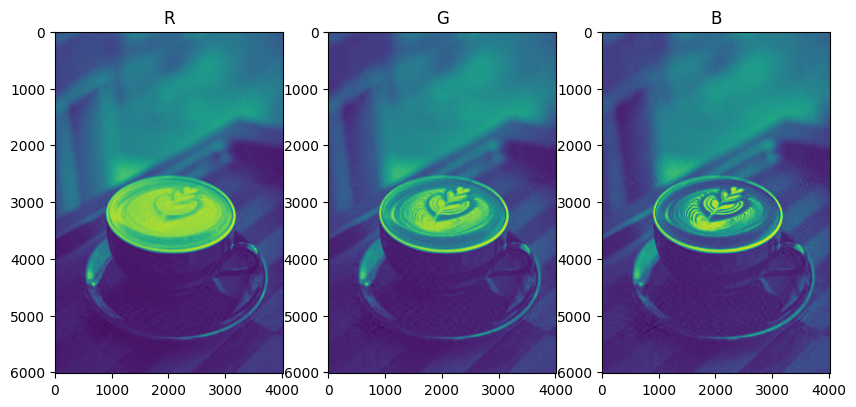

In [24]:
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.imshow(reconstructed_r_channel)
ax2.imshow(reconstructed_g_channel)
ax3.imshow(reconstructed_b_channel)

ax1.set_title("R")
ax2.set_title("G")
ax3.set_title("B")

plt.show()

In [26]:
#we are making the image from the individually compressed channels
reconstructed_image = cv2.merge((reconstructed_r_channel,reconstructed_g_channel,reconstructed_b_channel))

In [28]:
reconstructed_image.shape

(6016, 4016, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


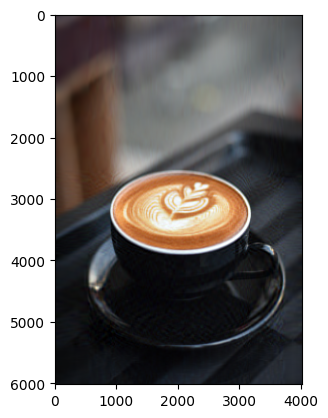

In [29]:
plt.imshow(reconstructed_image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


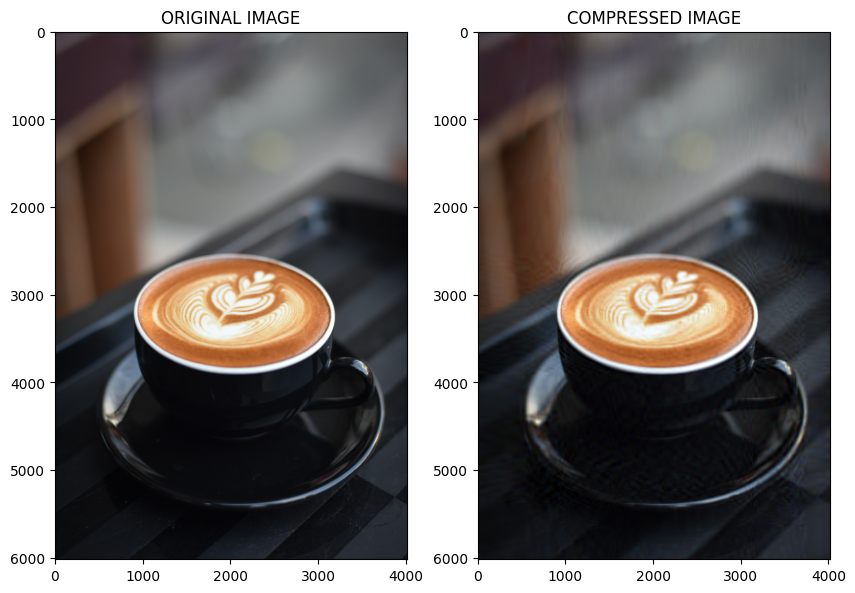

In [30]:
#our image is successfully compressed!
#lets compare side by side!
compare = plt.figure(figsize=(10,7))

ax1 = compare.add_subplot(1,2,1)
ax2 = compare.add_subplot(1,2,2)

fig1 = ax1.imshow(img)
fig2 = ax2.imshow(reconstructed_image)

ax1.set_title("ORIGINAL IMAGE")
ax2.set_title("COMPRESSED IMAGE")

plt.show()